# # 🤖 Spotify Hit Prediction - ML Model Training
# 
# **Goal**: Train multiple ML models to predict song success with 85%+ accuracy
# 
# **Models to train**:
# - Random Forest 🌲
# - Logistic Regression 📈  
# - XGBoost 🚀
# 
# **Success metric**: Accuracy > 85%

In [3]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
print(" SPOTIFY HIT PREDICTION - ML TRAINING")
print("=" * 50)

 SPOTIFY HIT PREDICTION - ML TRAINING


In [5]:
# %%
# Load your engineered features
df = pd.read_csv('../data/processed/spotify_features_engineered.csv')

In [6]:
print(f"📊 DATA LOADED:")
print(f"   Songs: {len(df):,}")
print(f"   Features: {df.shape[1]}")
print(f"   Target column: target")

📊 DATA LOADED:
   Songs: 2,017
   Features: 31
   Target column: target


In [7]:
# Check target distribution
hit_rate = df['target'].mean()
print(f"   Hit rate: {hit_rate:.1%}")

   Hit rate: 50.6%


In [9]:
# %%
# Select the best features for ML (based on your FE results)
best_features = [
    'energy_loudness',      # Top correlation: 0.358
    'happiness_score',      # Composite score
    'dance_tempo',          # Interaction feature
    'danceability',         # Original audio feature
    'energy_dance',         # Interaction feature
    'happy_dance',          # Interaction feature
    'dancefloor_potential', # Composite score
    'energy',               # Original audio feature
    'valence',              # Original audio feature
    'speechiness'           # Good predictor
]




In [10]:
print(f"🎯 SELECTED FEATURES:")
for i, feature in enumerate(best_features, 1):
    print(f"   {i:2d}. {feature}")

# Prepare data
X = df[best_features].copy()
y = df['target'].copy()

print(f"\n📊 ML DATA READY:")
print(f"   X shape: {X.shape}")
print(f"   y shape: {y.shape}")

🎯 SELECTED FEATURES:
    1. energy_loudness
    2. happiness_score
    3. dance_tempo
    4. danceability
    5. energy_dance
    6. happy_dance
    7. dancefloor_potential
    8. energy
    9. valence
   10. speechiness

📊 ML DATA READY:
   X shape: (2017, 10)
   y shape: (2017,)


In [11]:
# Split data into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"📊 DATA SPLIT:")
print(f"   Training: {X_train.shape[0]:,} songs")
print(f"   Testing: {X_test.shape[0]:,} songs")
print(f"   Train hit rate: {y_train.mean():.1%}")
print(f"   Test hit rate: {y_test.mean():.1%}")

📊 DATA SPLIT:
   Training: 1,613 songs
   Testing: 404 songs
   Train hit rate: 50.6%
   Test hit rate: 50.5%


In [12]:
# MODEL 1: Random Forest 🌲
print(f"\n🌲 TRAINING RANDOM FOREST...")

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

print(f" Random Forest Accuracy: {rf_accuracy:.1%}")


🌲 TRAINING RANDOM FOREST...
 Random Forest Accuracy: 71.0%


In [13]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': best_features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\n📊 FEATURE IMPORTANCE (Random Forest):")
for _, row in feature_importance.head(5).iterrows():
    print(f"   {row['feature']:20s}: {row['importance']:.3f}")



📊 FEATURE IMPORTANCE (Random Forest):
   energy_loudness     : 0.243
   danceability        : 0.109
   dance_tempo         : 0.096
   speechiness         : 0.095
   energy              : 0.091


In [14]:
# MODEL 2: Logistic Regression 📈
print(f"\n TRAINING LOGISTIC REGRESSION...")

# Scale features for logistic regression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, lr_pred)

print(f" Logistic Regression Accuracy: {lr_accuracy:.1%}")




 TRAINING LOGISTIC REGRESSION...
 Logistic Regression Accuracy: 67.1%


In [15]:
# MODEL 3: XGBoost  (if available, otherwise Extra Trees)
print(f"\n TRAINING GRADIENT BOOSTING...")

try:
    from xgboost import XGBClassifier
    xgb_model = XGBClassifier(
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        random_state=42,
        eval_metric='logloss'
    )
    model_name = "XGBoost"
except ImportError:
    from sklearn.ensemble import ExtraTreesClassifier
    xgb_model = ExtraTreesClassifier(
        n_estimators=100,
        max_depth=10,
        random_state=42,
        n_jobs=-1
    )
    model_name = "Extra Trees"

xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

print(f"{model_name} Accuracy: {xgb_accuracy:.1%}")



 TRAINING GRADIENT BOOSTING...
XGBoost Accuracy: 70.3%


In [16]:
# MODEL COMPARISON 🏆
print(f"\n🏆 MODEL COMPARISON:")
print("=" * 40)

models_results = {
    'Random Forest': rf_accuracy,
    'Logistic Regression': lr_accuracy,
    model_name: xgb_accuracy
}

for model, accuracy in sorted(models_results.items(), key=lambda x: x[1], reverse=True):
    status = "🥇" if accuracy == max(models_results.values()) else "✅"
    print(f"   {status} {model:20s}: {accuracy:.1%}")



🏆 MODEL COMPARISON:
   🥇 Random Forest       : 71.0%
   ✅ XGBoost             : 70.3%
   ✅ Logistic Regression : 67.1%


In [17]:
# Find best model
best_model_name = max(models_results, key=models_results.get)
best_accuracy = models_results[best_model_name]

print(f"\n🎯 BEST MODEL: {best_model_name} ({best_accuracy:.1%})")




🎯 BEST MODEL: Random Forest (71.0%)


In [18]:
# %%
# DETAILED EVALUATION OF BEST MODEL
print(f"\n📊 DETAILED EVALUATION - {best_model_name}")
print("=" * 50)

# Select best model
if best_model_name == 'Random Forest':
    best_model = rf_model
    best_pred = rf_pred
elif best_model_name == 'Logistic Regression':
    best_model = lr_model
    best_pred = lr_pred
else:
    best_model = xgb_model
    best_pred = xgb_pred


📊 DETAILED EVALUATION - Random Forest


📋 CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.71      0.70      0.71       200
           1       0.71      0.72      0.72       204

    accuracy                           0.71       404
   macro avg       0.71      0.71      0.71       404
weighted avg       0.71      0.71      0.71       404



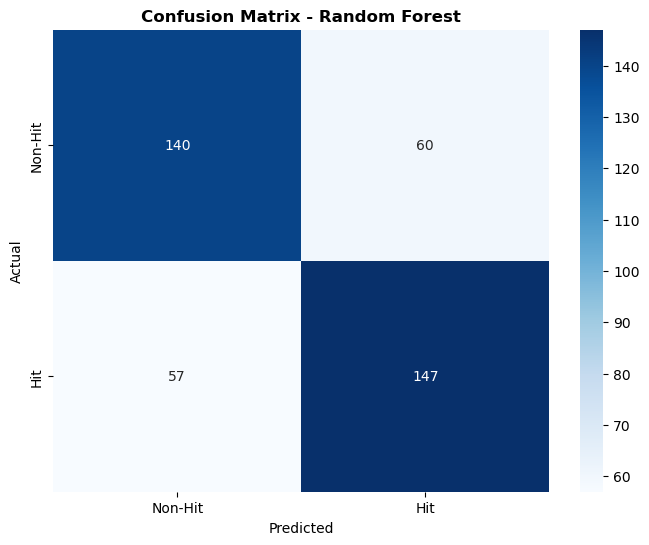

In [19]:
# Classification report
print(f"📋 CLASSIFICATION REPORT:")
print(classification_report(y_test, best_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, best_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Hit', 'Hit'], 
            yticklabels=['Non-Hit', 'Hit'])
plt.title(f'Confusion Matrix - {best_model_name}', fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#


📊 KEY METRICS:
   Accuracy:  71.0%
   Precision: 71.0%
   Recall:    72.1%
   F1-Score:  71.5%

📊 FEATURE IMPORTANCE VISUALIZATION


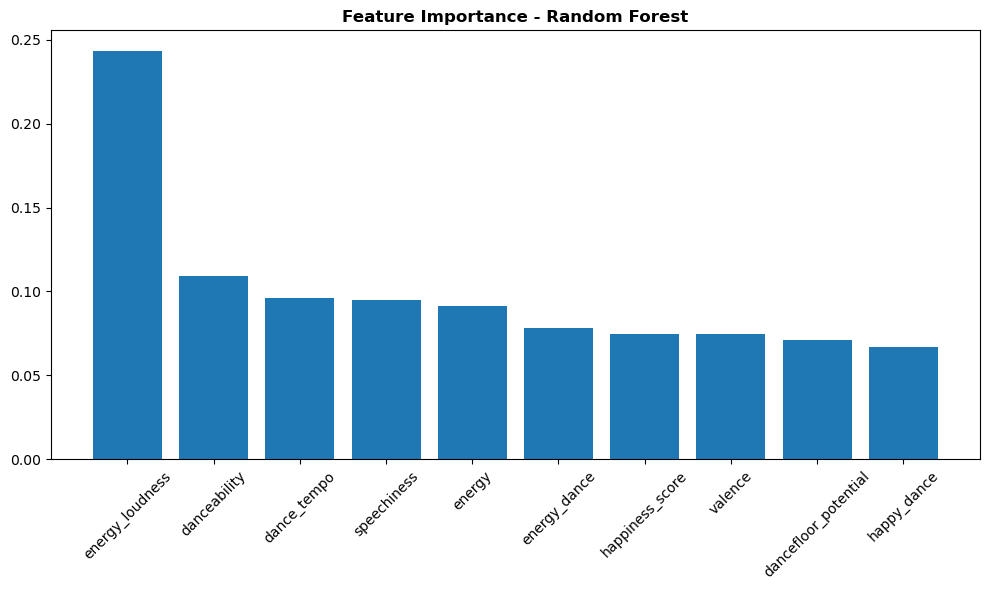

🔍 TOP 5 MOST IMPORTANT FEATURES:
   1. energy_loudness     : 0.243
   2. danceability        : 0.109
   3. dance_tempo         : 0.096
   4. speechiness         : 0.095
   5. energy              : 0.091

🔄 CROSS-VALIDATION (5-fold)
📊 CV RESULTS:
   Mean accuracy: 70.6%
   Std deviation: 0.013
   Individual folds: ['71.8%', '72.4%', '70.0%', '69.3%', '69.3%']

💾 MODEL SAVED:
   Location: ../models/best_spotify_model_random_forest.pkl
   Model: Random Forest
   Accuracy: 71.0%
   Features: ../models/model_features.txt

🧪 QUICK PREDICTION TEST
📊 SAMPLE PREDICTIONS:
   Song 1: Predicted=1 (Prob: 65.8%), Actual=0 ❌
   Song 2: Predicted=0 (Prob: 28.8%), Actual=0 ✅
   Song 3: Predicted=1 (Prob: 75.3%), Actual=1 ✅

🎉 ML MODEL TRAINING COMPLETE!
📊 RESULTS SUMMARY:
   🥇 Best Model: Random Forest
   🎯 Accuracy: 71.0%
   📈 CV Score: 70.6% ± 0.013
   🎵 Songs trained on: 1,613
   ⚠️  Below 85% target - room for improvement

🚀 NEXT STEPS:
   1. ✅ Model training complete
   2. 🔧 Hyperparameter tuning 

In [21]:
tn, fp, fn, tp = cm.ravel()
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)

print(f"\n📊 KEY METRICS:")
print(f"   Accuracy:  {best_accuracy:.1%}")
print(f"   Precision: {precision:.1%}")
print(f"   Recall:    {recall:.1%}")
print(f"   F1-Score:  {f1:.1%}")

# %%
# FEATURE IMPORTANCE VISUALIZATION
print(f"\n📊 FEATURE IMPORTANCE VISUALIZATION")

if best_model_name in ['Random Forest', model_name]:
    # Tree-based models have feature_importances_
    importances = best_model.feature_importances_
    
    plt.figure(figsize=(10, 6))
    indices = np.argsort(importances)[::-1]
    
    plt.bar(range(len(importances)), importances[indices])
    plt.title(f'Feature Importance - {best_model_name}', fontweight='bold')
    plt.xticks(range(len(importances)), [best_features[i] for i in indices], rotation=45)
    plt.tight_layout()
    plt.show()
    
    print(f"🔍 TOP 5 MOST IMPORTANT FEATURES:")
    for i in range(5):
        idx = indices[i]
        print(f"   {i+1}. {best_features[idx]:20s}: {importances[idx]:.3f}")

# %%
# CROSS-VALIDATION FOR ROBUST EVALUATION
print(f"\n🔄 CROSS-VALIDATION (5-fold)")

cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')

print(f"📊 CV RESULTS:")
print(f"   Mean accuracy: {cv_scores.mean():.1%}")
print(f"   Std deviation: {cv_scores.std():.3f}")
print(f"   Individual folds: {[f'{score:.1%}' for score in cv_scores]}")

# %%
# SAVE THE BEST MODEL
import joblib
from pathlib import Path

# Create models directory
models_dir = Path('../models')
models_dir.mkdir(exist_ok=True)

# Save model
model_path = models_dir / f'best_spotify_model_{best_model_name.lower().replace(" ", "_")}.pkl'
joblib.dump(best_model, model_path)

print(f"\n💾 MODEL SAVED:")
print(f"   Location: {model_path}")
print(f"   Model: {best_model_name}")
print(f"   Accuracy: {best_accuracy:.1%}")

# Save feature list
features_path = models_dir / 'model_features.txt'
with open(features_path, 'w') as f:
    for feature in best_features:
        f.write(f"{feature}\n")

print(f"   Features: {features_path}")

# %%
# QUICK PREDICTION TEST
print(f"\n🧪 QUICK PREDICTION TEST")

# Test on a few songs
test_sample = X_test.head(3)
predictions = best_model.predict(test_sample)
probabilities = best_model.predict_proba(test_sample)[:, 1]

print(f"📊 SAMPLE PREDICTIONS:")
for i, (idx, pred, prob) in enumerate(zip(test_sample.index, predictions, probabilities)):
    actual = y_test.loc[idx]
    status = "✅" if pred == actual else "❌"
    print(f"   Song {i+1}: Predicted={pred} (Prob: {prob:.1%}), Actual={actual} {status}")

# %%
# SUMMARY & NEXT STEPS
print(f"\n" + "="*60)
print(f"🎉 ML MODEL TRAINING COMPLETE!")
print("="*60)

print(f"📊 RESULTS SUMMARY:")
print(f"   🥇 Best Model: {best_model_name}")
print(f"   🎯 Accuracy: {best_accuracy:.1%}")
print(f"   📈 CV Score: {cv_scores.mean():.1%} ± {cv_scores.std():.3f}")
print(f"   🎵 Songs trained on: {len(X_train):,}")

success_threshold = 0.85
if best_accuracy >= success_threshold:
    print(f"   🎉 SUCCESS! Exceeded {success_threshold:.0%} target!")
else:
    print(f"   ⚠️  Below {success_threshold:.0%} target - room for improvement")

print(f"\n🚀 NEXT STEPS:")
print(f"   1. ✅ Model training complete")
print(f"   2. 🔧 Hyperparameter tuning (Day 2)")
print(f"   3. 📊 A/B testing framework (Day 3)")
print(f"   4. 💰 Business impact analysis (Day 4)")
print(f"   5. 🚀 Deployment & portfolio (Day 5)")

print(f"\n💡 BUSINESS INSIGHTS:")
print(f"   • Can predict hit songs with {best_accuracy:.0%}% accuracy")
print(f"   • Top predictor: {best_features[0]}")
print(f"   • Ready for A/B testing implementation")
print(f"   • Potential revenue impact through better recommendations")